# Linear Regression with Python 
# Introduction
## House Price Prediction on Boston Housing Dataset

You are a `real estate` agent and you want to `predict` the house price. It would be great if you can make some kind of `automated system` which predict price of a house based on various input which is known as feature. 

Supervised `Machine learning` algorithms needs some data to train its `model` before making a prediction.

We have a Boston Dataset.

## Where can Linear Regression be used?

<img src='https://pocket-image-cache.com/direct?url=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*LEmBCYAttxS6uI6rEyPLMQ.png&resize=w880'>

It is a very `powerful technique` and can be used to understand the factors that influence `profitability`. It can be used to `forecast sales` in the coming months by analyzing the sales data for previous months. It can also be used to gain various insights about `customer behaviour`.

##  Linear Regression 
Let's first understand what exactly `Regression` means it is a statistical method used in finance, investing, and other disciplines that attempts to determine the `strength` and `character` of the relationship between one `dependent variable` (usually denoted by `Y`) and a series of other variables known as `independent variables`.   
`Linear Regression` is a statistical technique where based on a set of `independent variable(s)` a dependent variable is `predicted`. 

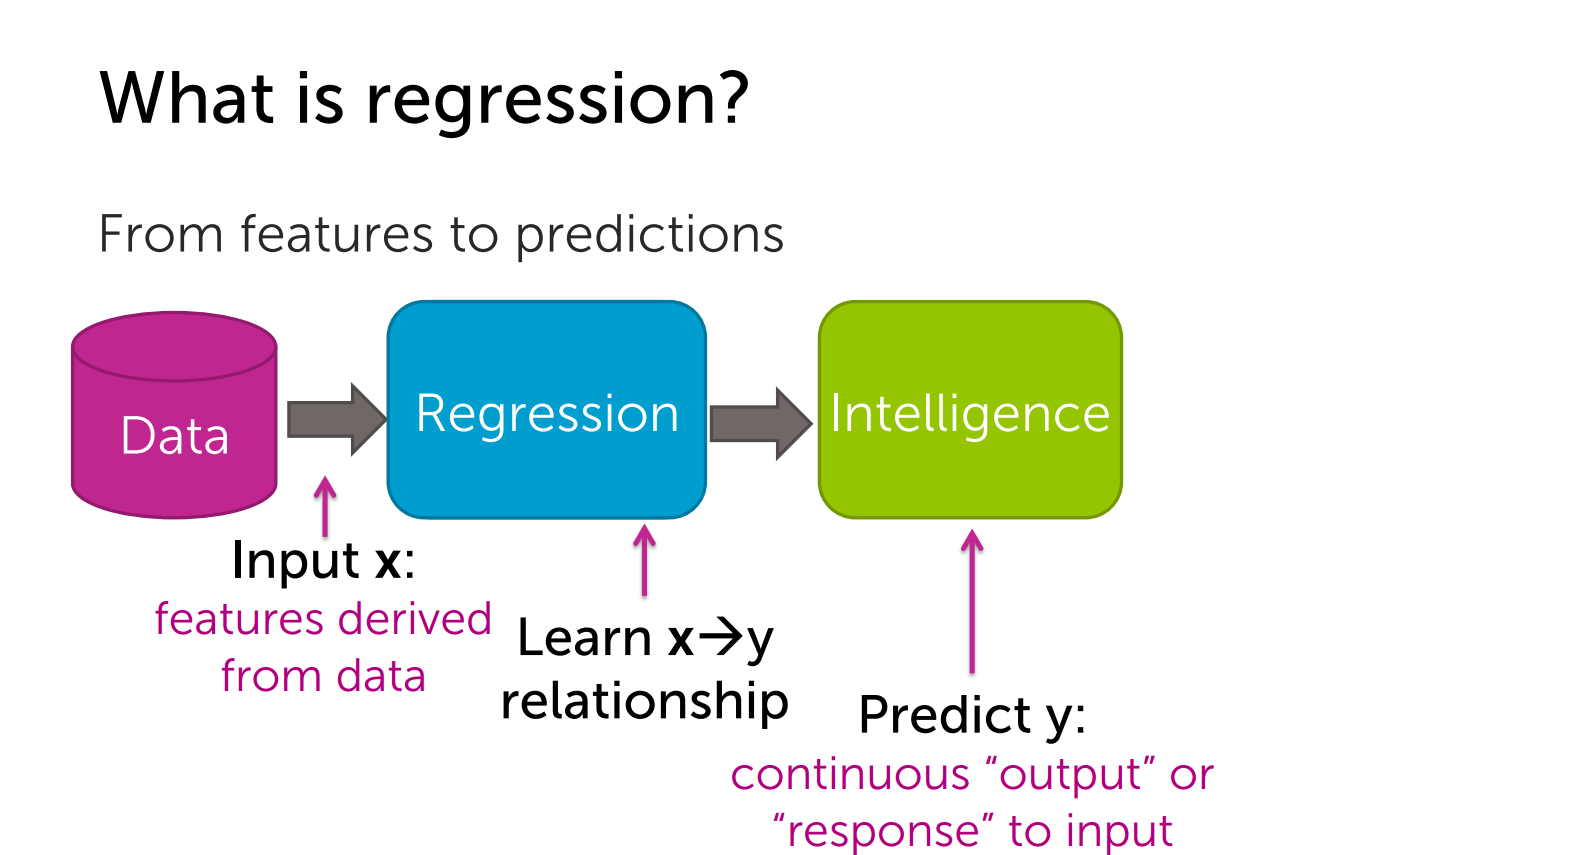

---

## Regression Examples
#### Stock Price Prediction
We can `predict` the price of `stock` depends on depedent variable,`x`. let's say recent history of stock price,news events.

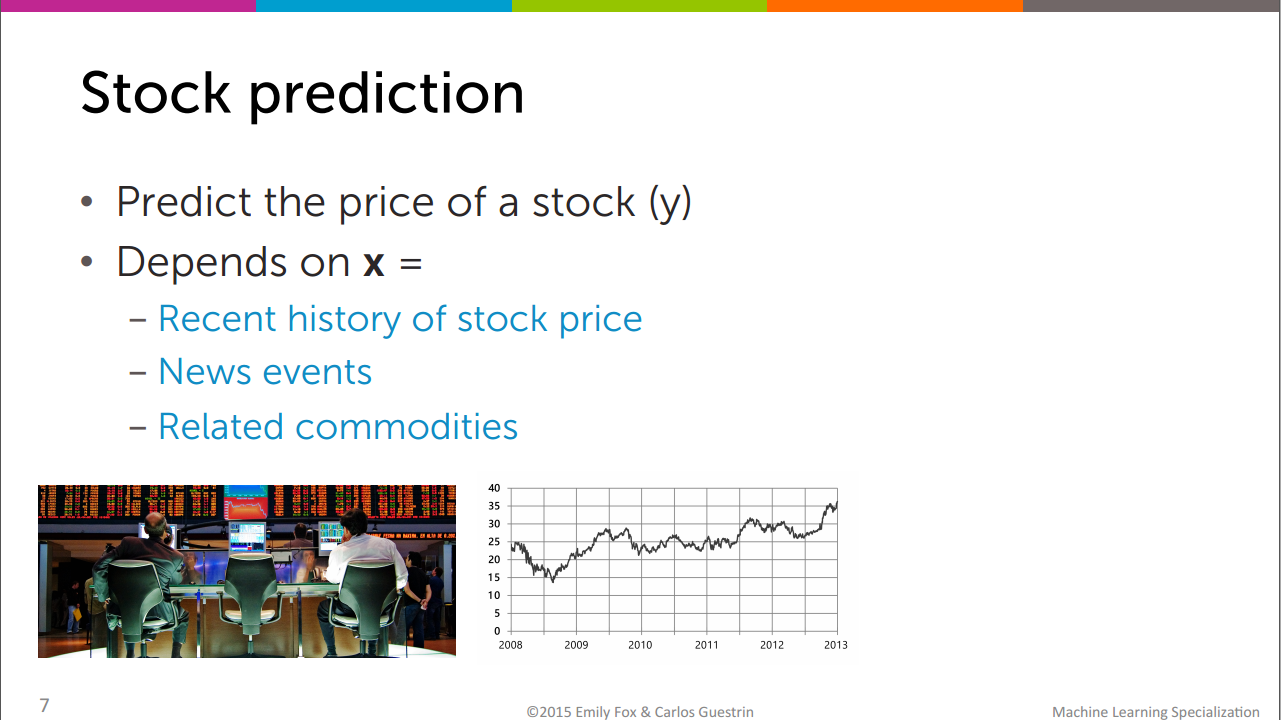

#### Tweet popularity
We can also `estimate` number of people will `retweet` for your tweet in tewitter based number of followers,popularity of hashtag.

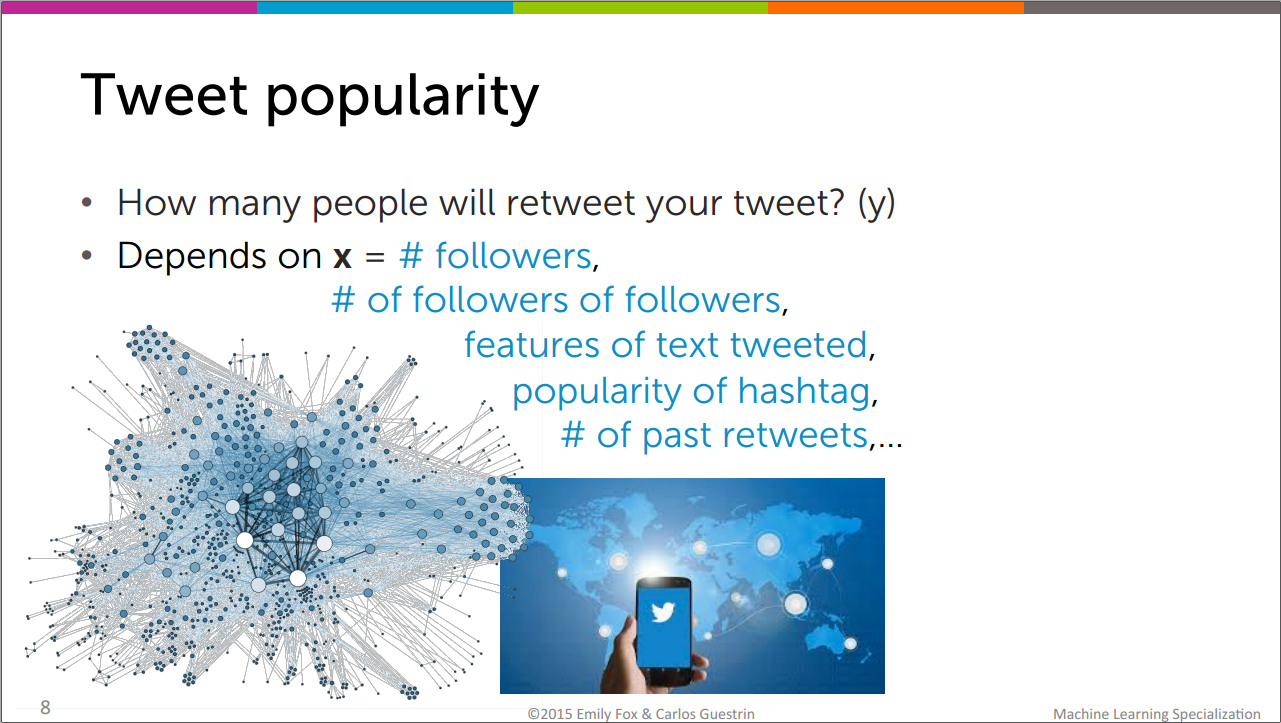

#### In real estate
As we discussed earlier,We can also  `predict` the house prices and land prices in real estate.

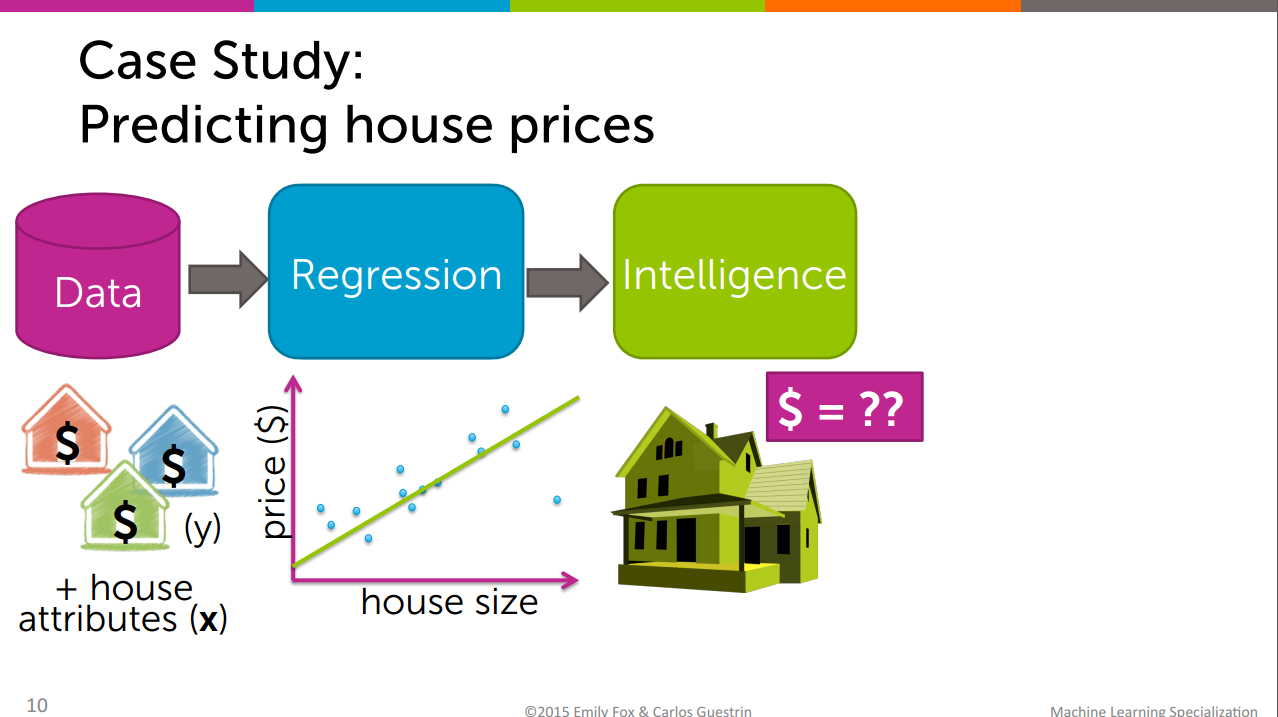

## Regression Types 
It is of two types: `simple linear regression` and `multiple linear regression`.        
**Simple linear regression:** It is characterized by an `variable quantity`.        

#### Simple Linear Regression


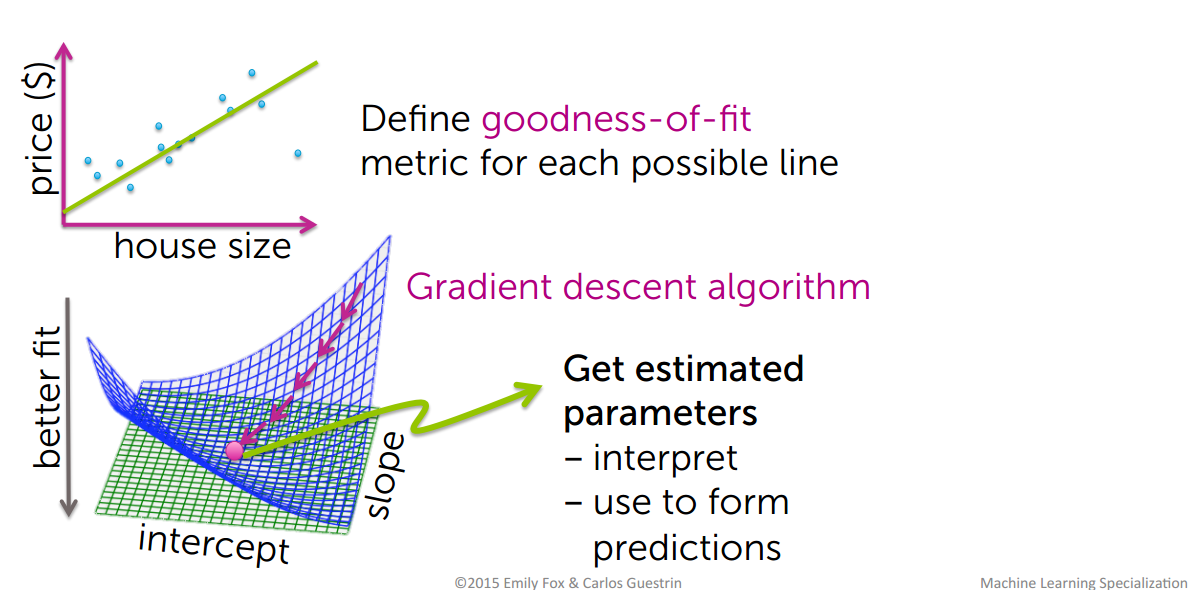

$$\huge y_{i} =\beta _{0} + \beta _{1} X_{i} + \varepsilon_{i}$$

y = dependent variable     
$ \beta_{0}$ = population of intercept    
$ \beta_{i}$ = population of co-efficient   
x = independent variable    
$ \varepsilon_{i}$ = Random error   


#### Multiple Linear Regression 
It(as the name suggests) is characterized by `multiple independent variables` (more than `1`). While you discover the simplest `fit line`, you'll be able to adjust a `polynomial or regression` toward the `mean`. And these are called `polynomial or regression` toward the `mean`.

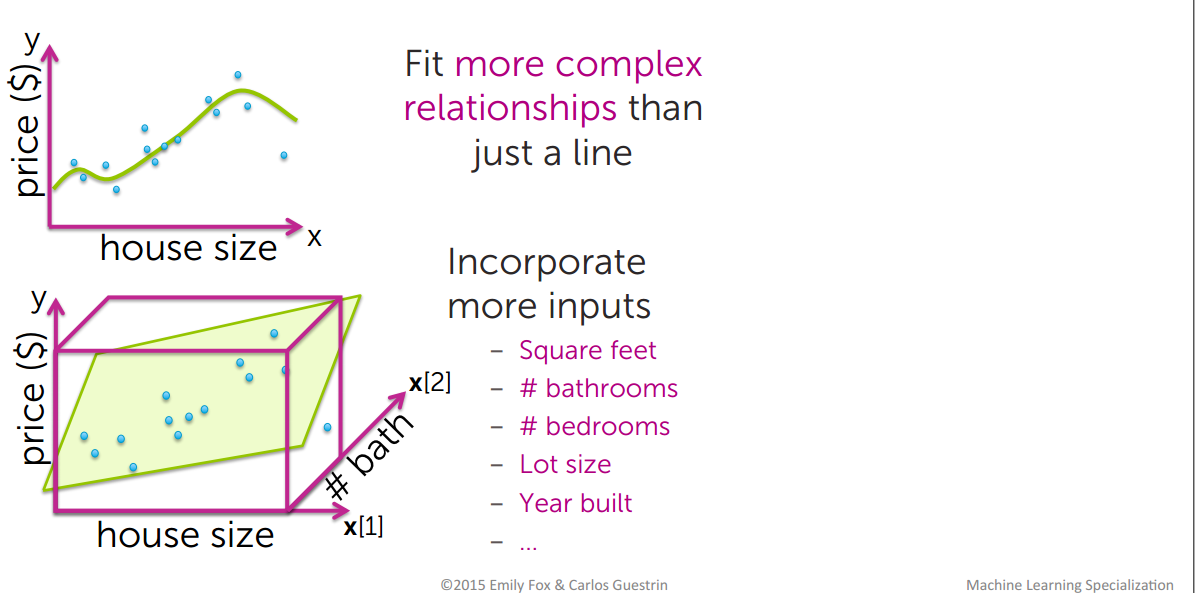

---

## Assessing the performance of the model

<img src = 'https://pocket-image-cache.com/direct?url=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*6lzTBeDt_J39XPvhI4NAMg.png&resize=w880' >

#### How do we determine the best fit line?

The line for which the the `error` between the `predicted values` and the `observed values` is minimum is called the `best fit line` or `the regression line`. These errors are also called as `residuals`. The residuals can be visualized by the vertical lines from the observed data value to the `regression line`.

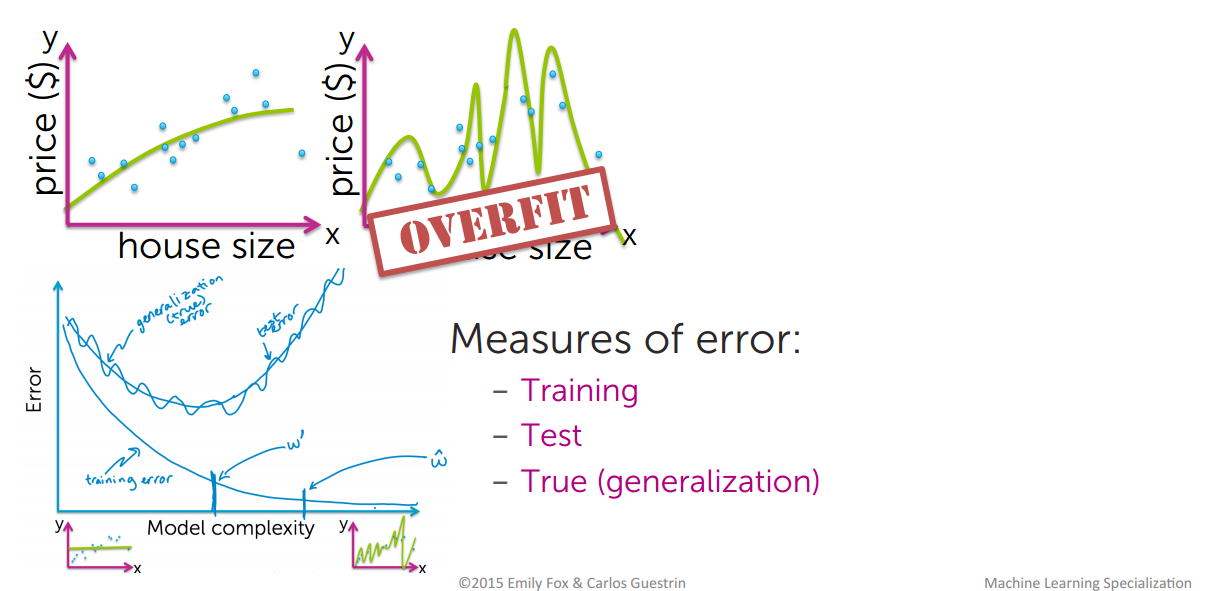

## Bias-Variance tradeoff 
`Bias` are the simplifying `assumptions` made by a model to make the target function easier to learn.
Variance is the amount that the estimate of the target function will change if different training data was used.
The goal of any supervised `machine learning` algorithm is to achieve `low bias and low variance.` In turn the algorithm should achieve `good` prediction performance.

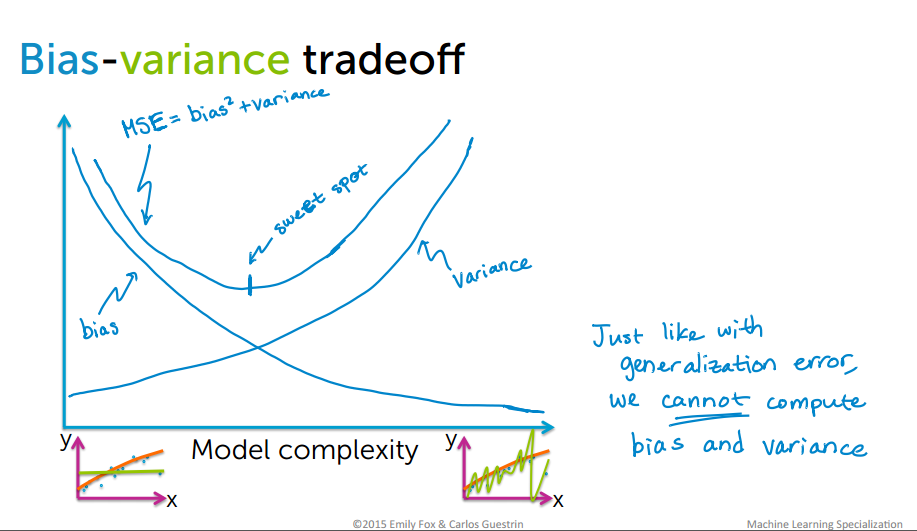

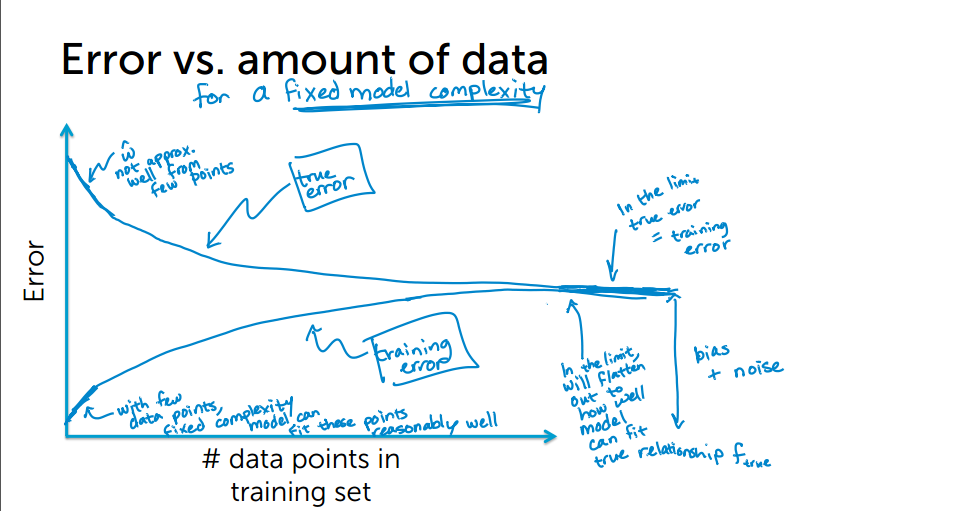

# What is `sklearn` and `train-test-split`

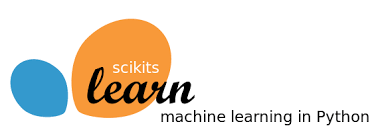

### scikit-learn

- Machine Learning in Python

- Simple and efficient tools for data mining and data analysis

- Accessible to everybody, and reusable in various contexts

- Built on NumPy, SciPy, and matplotlib

- Open source, commercially usable - BSD license

Learn more here: https://scikit-learn.org/stable/

`! pip install -U scikit-learn`

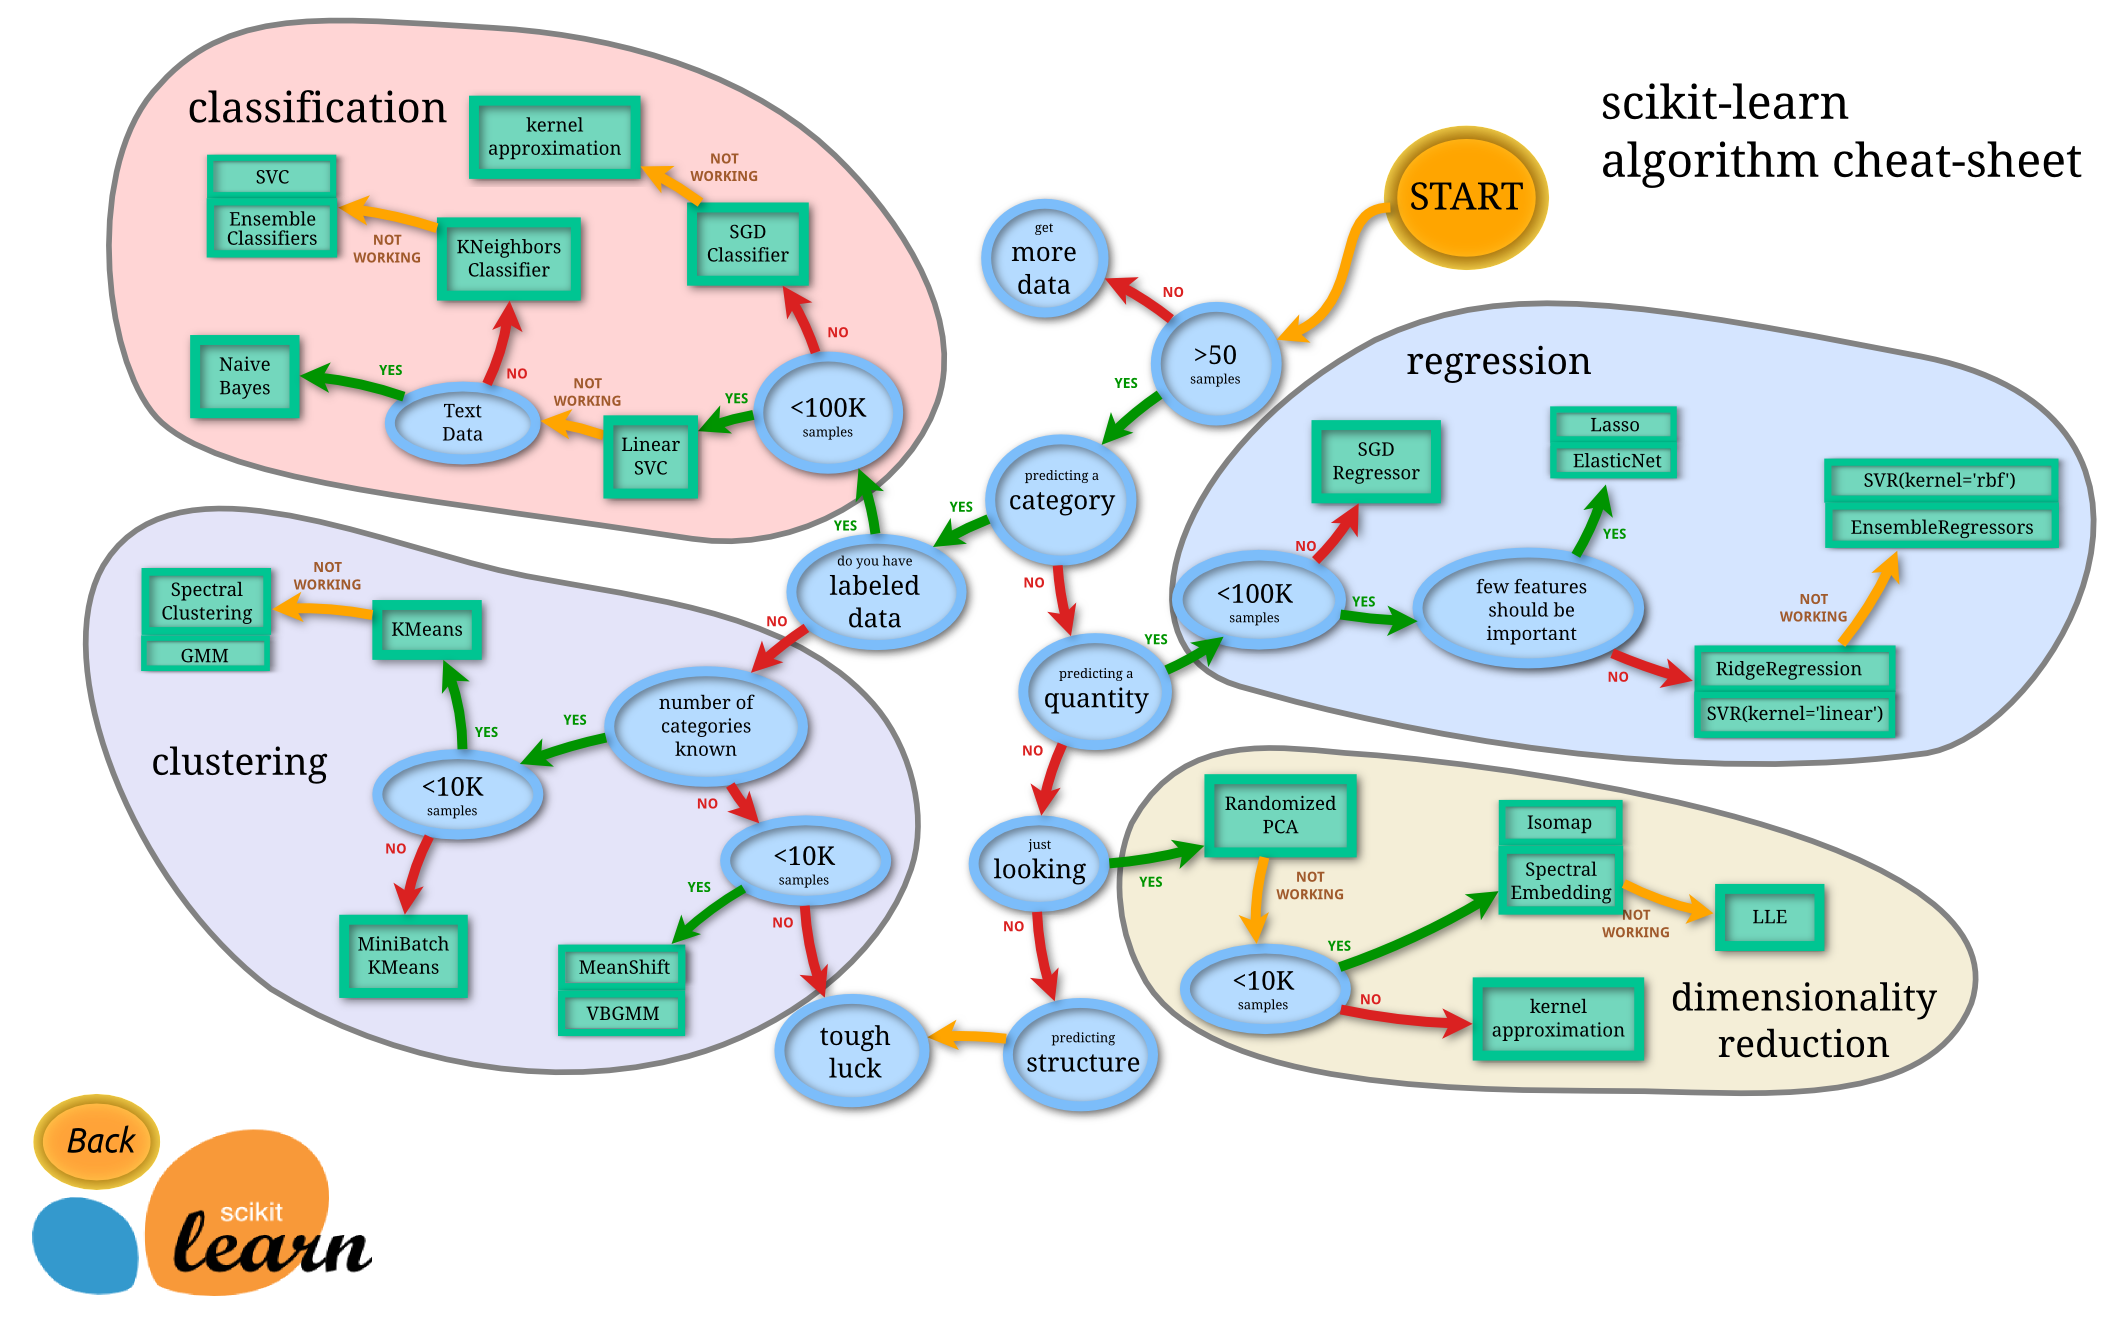
Image Source: https://cdn-images-1.medium.com/max/2400/1*2NR51X0FDjLB13u4WdYc4g.png


Let's discuss something about training a `ML model`, this model generally will try to `predict` one variable based on all the others. To verify how well this `model` works, we need a second data set, the `test set`. We use the model we learned from the `training data` and see how well it predicts the variable in question for the `training set`. When given a `data set` for which you want to use `Machine Learning`, typically you would divide it randomly into 2 sets. One will be used for `training`, the other for `testing`. 

### Training and testing splitting 

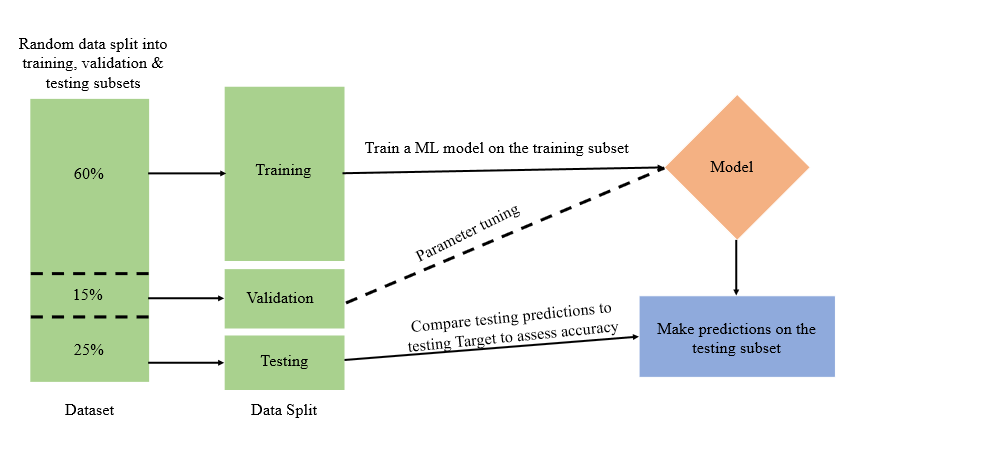

## Let's Get Started with Coding - Load Dataset

In [5]:
# !pip install numpy --upgrade
# !pip install pandas --upgrade
# !pip install matplotlib --upgrade
# !pip install seaborn --upgrade
# !pip install scikit-learn --upgrade
# !python -m pip install --upgrade pip

In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
boston = load_boston()
# boston

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
len(boston.feature_names)

13

In [15]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [17]:
boston.data.shape

(506, 13)

## Dataset Analysis 

In [20]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [21]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88

In [22]:
data.sample(5)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
95   0.12204   0.0   2.89   0.0  0.445  6.625   57.8  3.4952   2.0  276.0   
119  0.14476   0.0  10.01   0.0  0.547  5.731   65.2  2.7592   6.0  432.0   
263  0.82526  20.0   3.97   0.0  0.647  7.327   94.5  2.0788   5.0  264.0   
482  5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
23   0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   

     PTRATIO       B  LSTAT  
95      18.0  357.98   6.65  
119     17.8  391.50  13.61  
263     13.0  393.42  11.25  
482     20.2  395.28   7.01  
23      21.0  394.54  19.88

In [23]:
data['Price'] = boston.target

In [24]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [25]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [27]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Exploratory Data Analysis 

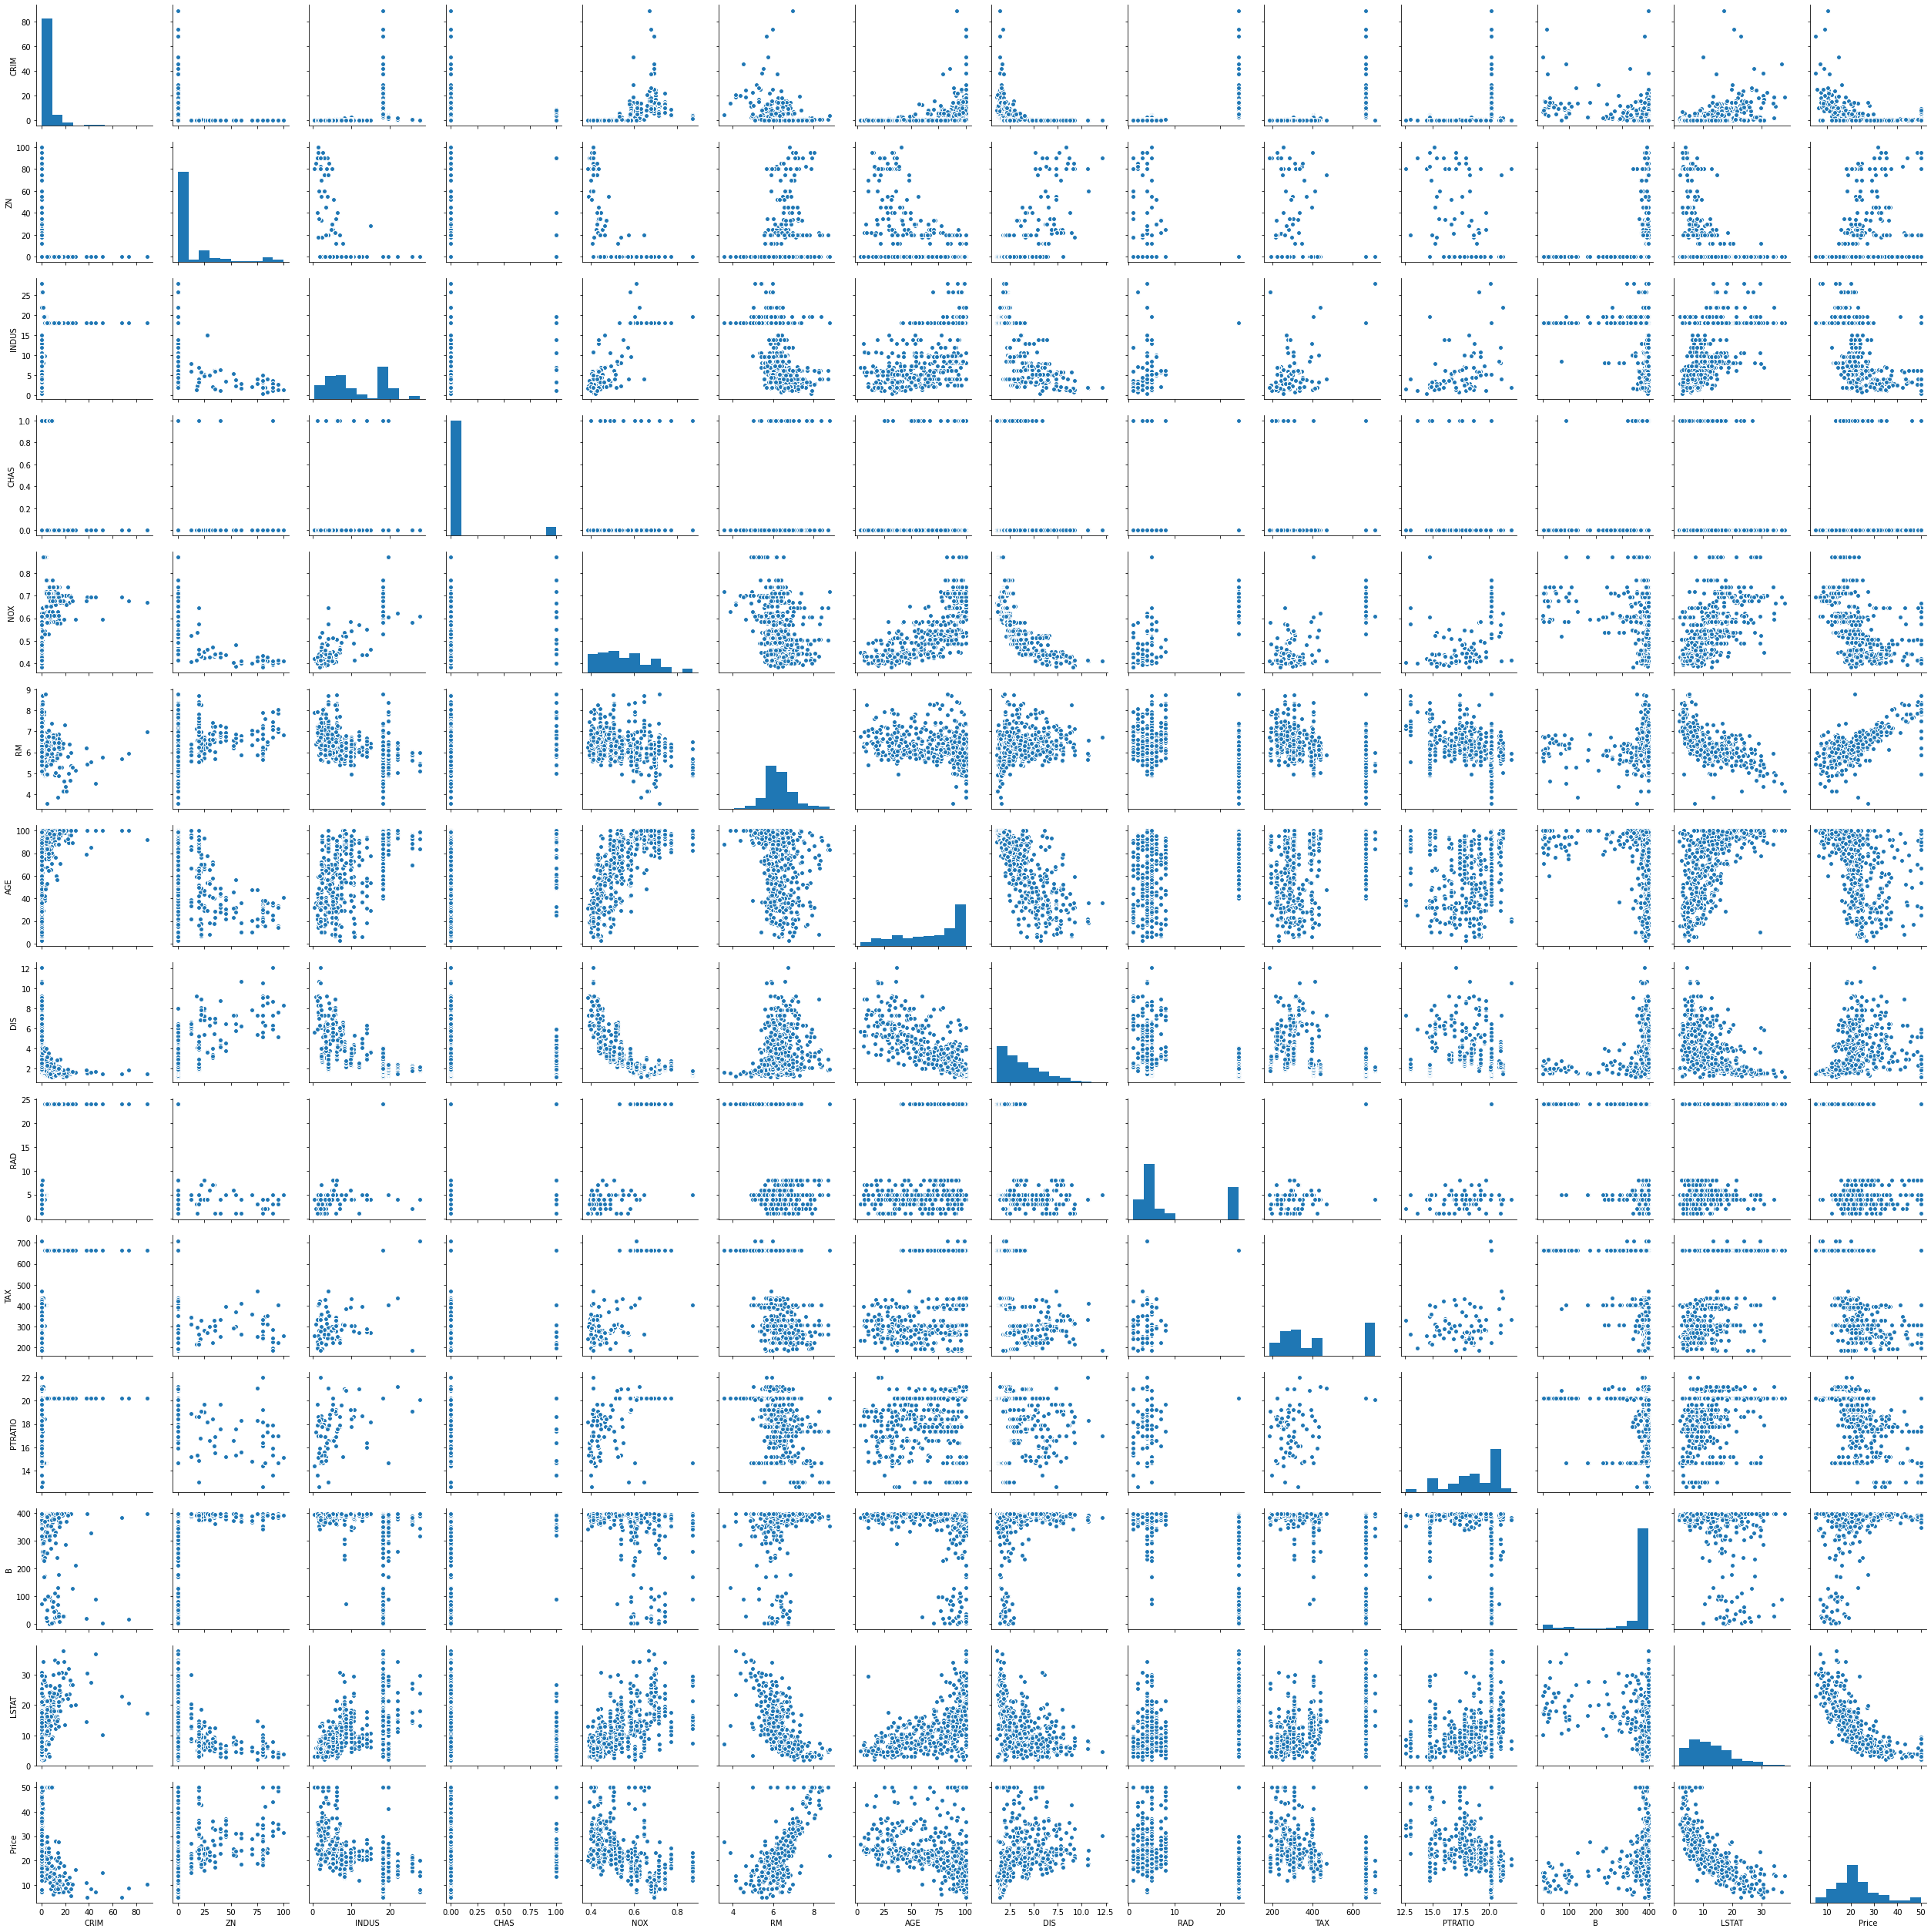

In [28]:
sns.pairplot(data)

In [29]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

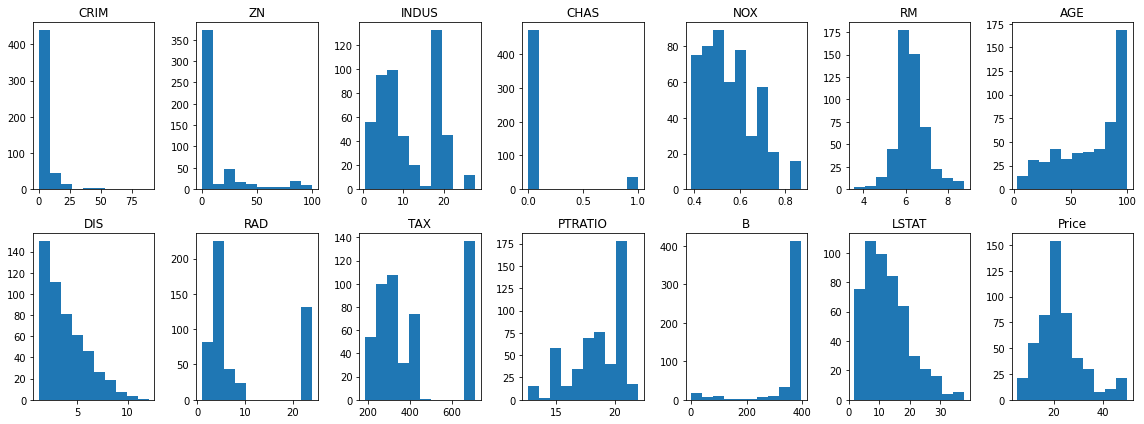

In [34]:
rows = 2
cols = 7

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,6))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        ax[i][j].hist(data[col[index]])
        ax[i][j].set_title(col[index])
        index = index + 1
        
plt.tight_layout()
plt.show()

In [37]:
corrmat = data.corr()
corrmat

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

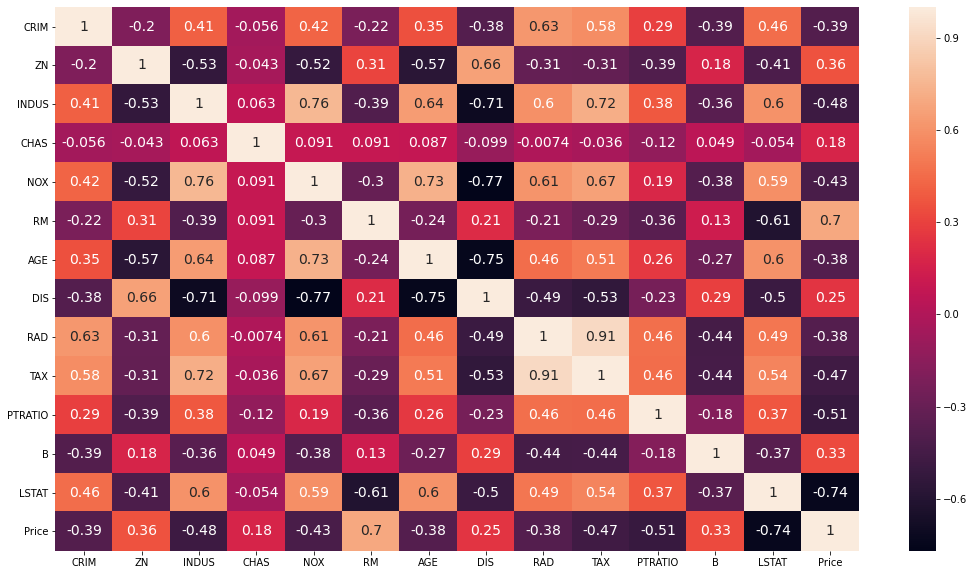

In [42]:
plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size':14})
plt.show()

## Train Test Split and Model Training

In [46]:
X = data.drop(['Price'], axis=1)
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [49]:
y = data['Price']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_predict = model.predict(X_test)

In [57]:
y_predict, y_test

(array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
        19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
         5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
        32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
        24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
        10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
        18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
        19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
        26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
        25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
        20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
        21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
        17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
        32.76358681, 18.7124637 , 19.78693475, 19.0

## How to Evaluate the Regression Model Performance

It is difficult to measure the `quality` of a given model without `quantifying` its performance over `training` and `testing`. This is typically done using some type of performance metric, whether it is through calculating some type of `error`, the goodness of fit, or some other useful measurement. For this project, you will be calculating the `coefficient of determination`, $R^2$, to quantify your model's performance. `The coefficient of determination` for a model is a useful statistic in `regression analysis`, as it often describes how "good" that model is at making predictions.

The values for $R^2$ range from `0` to `1`, which captures the percentage of `squared correlation` between the predicted and actual values of the target variable. A model with an $R^2$ of `0` always `fails` to predict the target variable, whereas a model with an $R^2$ of `1` `perfectly` predicts the target variable. Any value between `0` and `1` indicates what `percentage` of the target variable, using this model, can be explained by the features. A model can be given a negative $R^2$ as well, which indicates that the model is no better than one that naively predicts the `mean` of the target variable.

For the `performance_metric function` in the code cell below, you will need to implement the following:

Use r2_score from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
Assign the performance score to the score variable.

Now we will find $R^2$ which is defined as follows :
 $$SS_{t} = {\frac 1n\sum_{i=1}^n(y_i-\hat{y})^2}$$
 $$SS_{r} = {\frac 1n\sum_{i=1}^n(y_i-\bar{y})^2}$$
 $$R^{2} = 1-\frac{SS_{t}}{SS_{r}}$$

$SS_{t}$ = total sum of squares   
$SS_{r}$ = total sum of squares of residuals  
$R^2$  = range from 0 to 1 and also negative if model is completely wrong.

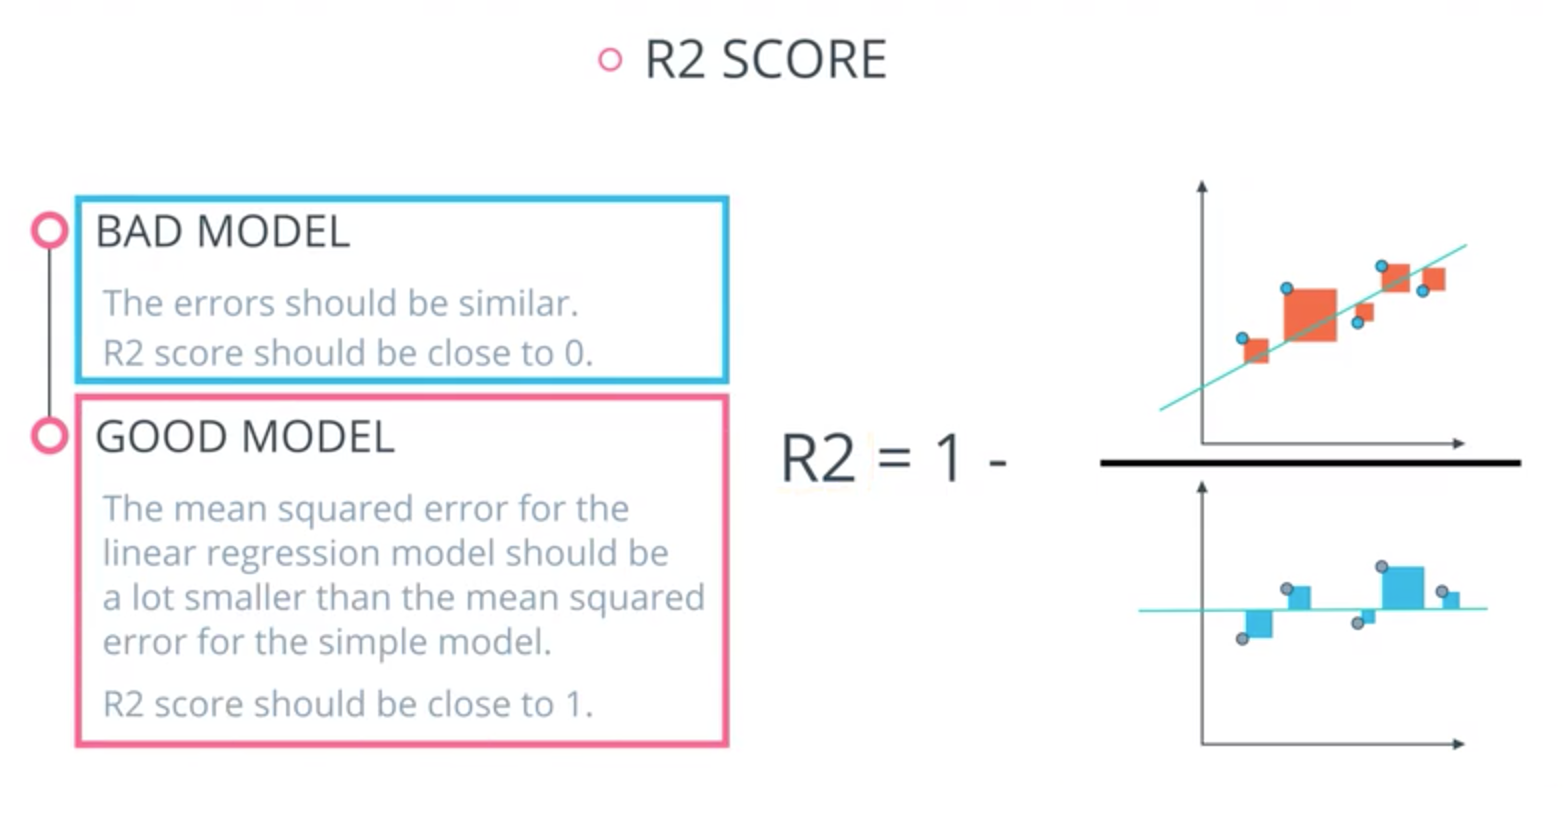

## Regression Evaluation Metrics 


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the `absolute value of the errors`:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the `squared errors`:

$${\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Root Mean Squared Error** (RMSE) is the square root of the `mean of the squared errors`:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to `understand`, because it's the `average error`.
- **MSE** is more popular than MAE, because MSE `"punishes"` larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is `interpretable in the "y" units`.

All of these are **loss functions**, because we want to minimize them.

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_score(y_test, y_predict)

0.589222384918251

In [60]:
mean_absolute_error(y_test, y_predict)

3.8429092204445023

In [61]:
mean_squared_error(y_test, y_predict)

33.448979997676524

In [62]:
np.sqrt(mean_squared_error(y_test, y_predict))

5.783509315085134

In [63]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

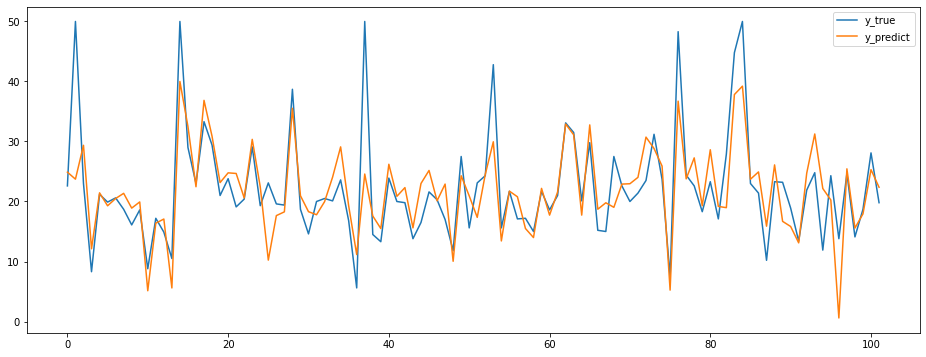

In [68]:
plt.subplots(figsize=(16,6))
x_points = list(range(len(y_test)))
plt.plot(x_points, y_test, label='y_true')
plt.plot(x_points, y_predict, label='y_predict')
plt.legend()
plt.show()

## Plotting Learning Curves

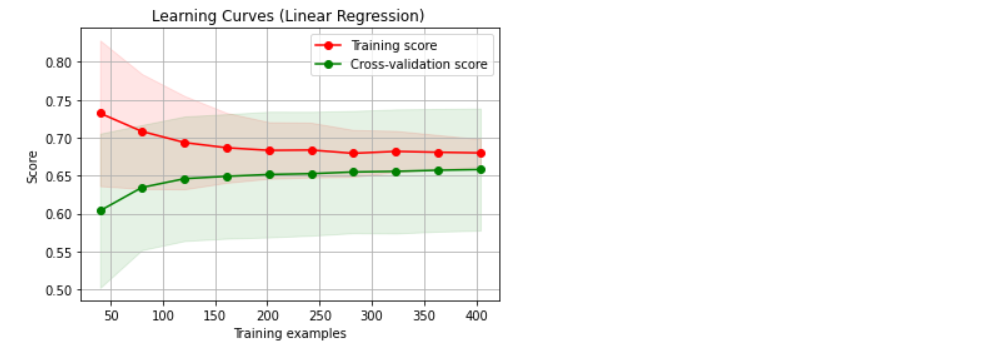

In [69]:
from sklearn.model_selection import learning_curve, ShuffleSplit

In [74]:
def plot_learning_curve(estimator, title, X,y, ylim=None, cv=None,
                       train_size=np.linspace(0.1, 1, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Traning Examples')
    plt.ylabel('score')
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_size)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std, alpha=0.1, color='red')
    
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std,
                    test_scores_mean+test_scores_std, alpha=0.1, color='green')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test Score')
    
    plt.legend(loc='best')
    
    return plt
    

In [75]:
# X

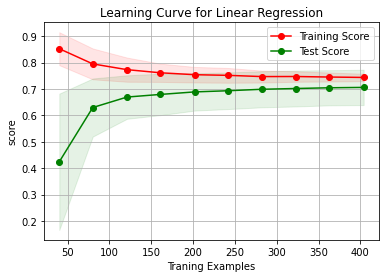

In [76]:
title = 'Learning Curve for Linear Regression'
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
model = LinearRegression()
plot_learning_curve(model, title, X, y, ylim=(0.7, 1.01), cv=cv)
plt.show()